# **Lab - Model Development**

<b>ITM-370: Data Analytics</b><br>
**Lecturer: HAS Sothea, PhD**

-------

**Objective:** This practical lab aims to enhance your skills in implementing simple and multiple linear regression using market data covered in the course.

> **The `Jupyter Notebook` for this Lab can be downloaded here: [Lab_Model_development.ipynb](https://hassothea.github.io/Data_Analytics_AUPP/Labs/Lab_Model_development.ipynb)**.

> **Or you can work with this notebook in `Google Colab` here: [Lab_Model_development.ipynb](https://colab.research.google.com/drive/1vOtcbNdVCJPZzuZA0JI-i7o8lk9BI2co?usp=sharing)**.

-----------

# Importing Market Data

You need internet to load the data by running the following codes. We will simply call it `data`.

In [25]:
import pyreadr
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/hassothea/Data_Analytics_AUPP/refs/heads/main/data/marketing.csv", sep=",")
data.head(5)

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


## 1. Study correlation matrix

**A.** Compute correlation matrix of this data using `pd.corr()` function. Explain this correlation matrix (see [slide 21](https://hassothea.github.io/Data_Analytics_AUPP/slides/Model_development.html#/correlation-matrix-1)).

In [26]:
data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**B.** Plot scatterplot of the following pairs:
- Facebook (x-axis) vs Sales (y-axis)
- Newspaper (x-axis) vs Sales (y-axis)

You should add title and using proper name for each axis.

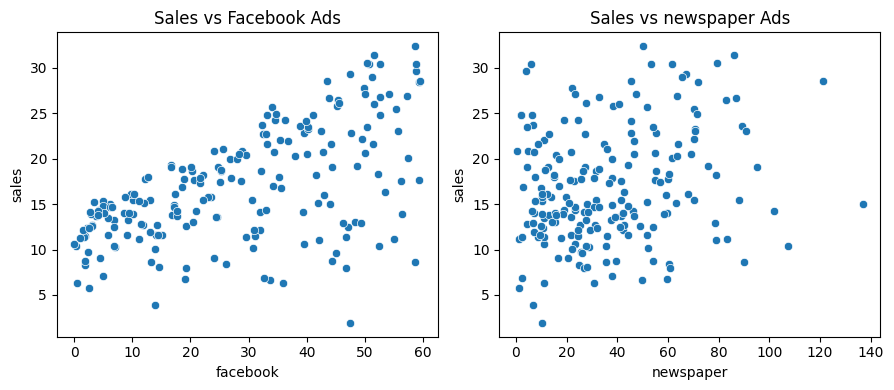

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

_, ax = plt.subplots(1,2, figsize=(9, 4))
sns.scatterplot(data, x="facebook", y="sales", ax=ax[0])
ax[0].set_title("Sales vs Facebook Ads")

sns.scatterplot(data, x="newspaper", y="sales", ax=ax[1])
ax[1].set_title("Sales vs newspaper Ads")
plt.tight_layout()

> **Key remark**: Correlation matrix tells us a lot about which inputs are useful for constructing the model. If we were to build a model using only one input, use the one having the highest correlation with the target. On the other hand, putting many highly correlated inputs together can result in a bad model because it can lead to multicollinearity. This means the model has difficulty distinguishing the individual effects of each input variable, resulting in unstable and unreliable coefficient estimates. Additionally, it can inflate the variance of the regression coefficients, making the model less interpretable and potentially overfitting the data. Simply put, it muddies the waters.

## 2. Simple Linear Regression

**A.** We already used `YouTube` as an explanatory variable to predict `Sales` in the course. 

- Now, build a SLR model to predict `sales` using `Facebook`.

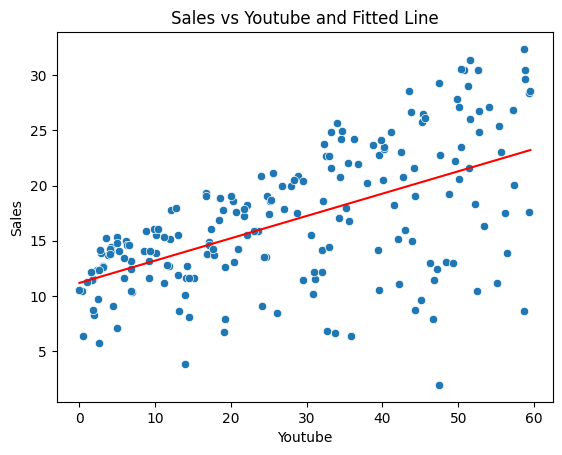

In [28]:
from sklearn.linear_model import LinearRegression

# Prepare data X and y
X1, y = data[['facebook']], data['sales']

# Build model
lr1 = LinearRegression()

# Fit the model on the data
lr1 = lr1.fit(X1, y)

# Plot fitted line
y_hat1 = lr1.predict(X1)
sns.scatterplot(x=X1.to_numpy().reshape(-1), y=y)
sns.lineplot(x=X1.to_numpy().reshape(-1), y=y_hat1, color="red")
plt.xlabel("Youtube")
plt.ylabel("Sales")
plt.title("Sales vs Youtube and Fitted Line")
plt.show()

- Perform model dignosis:
    - Compute $R^2$ then explain the observed value.
    - Compute and plot residuals for this model. Conclude.

R-squared: 0.33203245544529536


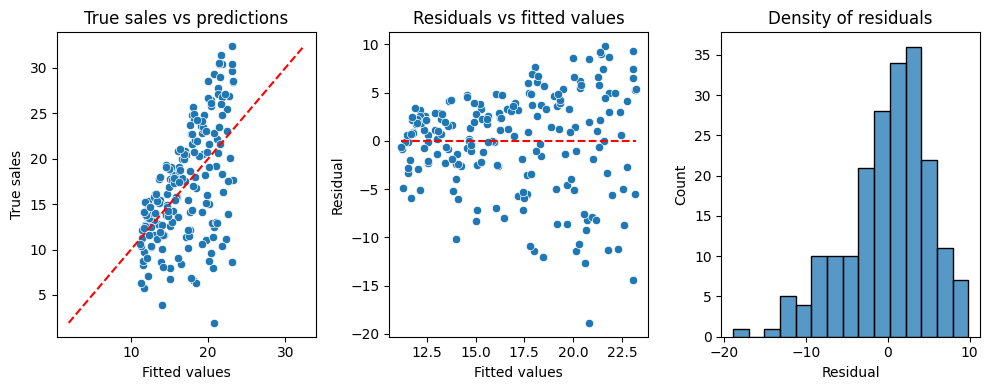

In [29]:
from sklearn.metrics import r2_score
# Compute R-squared
print(f"R-squared: {r2_score(y,y_hat1)}")

# Graph
resid1 = y - y_hat1
data_resid1 = pd.DataFrame({
    'True sales': y,
    'Residual' : resid1,
    'Fitted values': y_hat1
})

import numpy as np
_, ax = plt.subplots(1,3, figsize=(10, 4))
sns.scatterplot(data_resid1, x="Fitted values", y="True sales", ax=ax[0])
sns.lineplot(x=[np.min(y), np.max(y)], y=[np.min(y), np.max(y)], ax=ax[0], color="red", linestyle="--")
ax[0].set_title("True sales vs predictions")

sns.scatterplot(data_resid1, x="Fitted values", y="Residual", ax=ax[1])
sns.lineplot(x=[np.min(y_hat1), np.max(y_hat1)], y=[0, 0], ax=ax[1], color="red", linestyle="--")
ax[1].set_title("Residuals vs fitted values")

sns.histplot(data_resid1, x="Residual", ax=ax[2])
ax[2].set_title("Density of residuals")
plt.tight_layout()
plt.show()

> - The first graph is the qqplot (true vs predict) of the model. The closer the points to the line represents the better fit the model. Here, the points are biased indicating the poor quality of the model.
> - Second plot indicates that the residuals are not so symmetric around 0 and the variation are not consistent. They have larger spreads around large fitted values which indicating the poor predictive power of the model around large values of sales.
> - The residual density is skewed to left inidcating that the model tends to overestimate the true sales (because residual $e < 0\Leftrightarrow y-\hat{y}<0\Leftrightarrow y < \hat{y}$).

**B.** Repeat question **(A)** but using `newspaper` as an input for SLR instead.

In [30]:
# Try to do it using the previous example

## 3. Multiple Linear Regression

We already build a MLR with two inputs during the course. Now, you will do it using all three inputs.

**A.** Build a MLR model using the three inputs.

In [31]:
# Prepare data
X2, y = data.iloc[:, :3], data.sales

# Build model
mlr = LinearRegression()
mlr = mlr.fit(X2, y)

# R-squared
y_hat2 = mlr.predict(X2)
print(f"MLR R-squared: {r2_score(y,y_hat2)}")

MLR R-squared: 0.8972106381789521


**B.** Perform model diagnosis as illustrated in the course (from [slide 26](https://hassothea.github.io/Data_Analytics_AUPP/slides/Model_development.html#/multiple-linear-regreesion-mlr)). Interpret your findings and conclude.

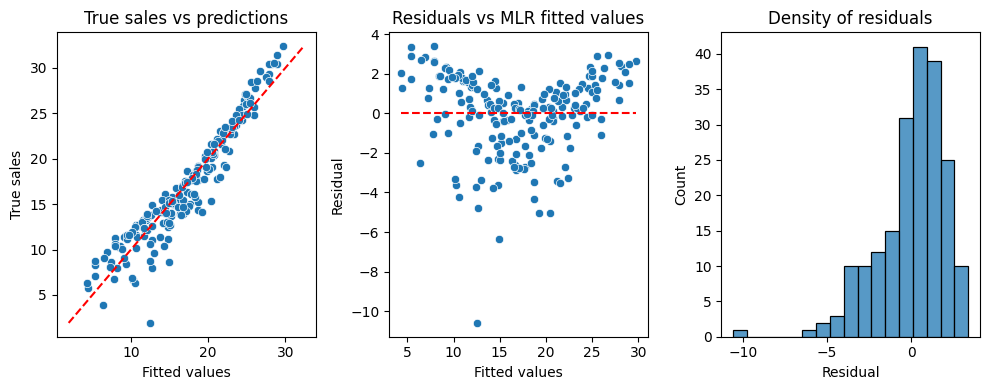

In [32]:
# Graph
resid2 = y - y_hat2
data_resid2 = pd.DataFrame({
    'True sales': y,
    'Residual' : resid2,
    'Fitted values': y_hat2
})

import numpy as np
_, ax = plt.subplots(1,3, figsize=(10, 4))
sns.scatterplot(data_resid2, x="Fitted values", y="True sales", ax=ax[0])
sns.lineplot(x=[np.min(y), np.max(y)], y=[np.min(y), np.max(y)], ax=ax[0], color="red", linestyle="--")
ax[0].set_title("True sales vs predictions")

sns.scatterplot(data_resid2, x="Fitted values", y="Residual", ax=ax[1])
sns.lineplot(x=[np.min(y_hat2), np.max(y_hat2)], y=[0, 0], ax=ax[1], color="red", linestyle="--")
ax[1].set_title("Residuals vs MLR fitted values")

sns.histplot(data_resid2, x="Residual", ax=ax[2])
ax[2].set_title("Density of residuals")
plt.tight_layout()
plt.show()

> - QQplot on the left indicates much better predictions of the model as the points are much closer to the line compared to the previous case.
> - The residuals are not symmetric. The shape suggests that the model under estimates the true sales around low and high values but over estimates the middle range values of sales.
> - The density of the residuals is still skewed a little to the left as indicating the higher predictions than reality. However, this is much more better compared to the previous case in general.

# Further readings
- Graphical tools:
    - [`matplotlib`](https://matplotlib.org/stable/index.html)
    - [`seaborn`](https://seaborn.pydata.org/)
    - [`plotly`](https://plotly.com/python/)
- [Linear regression, Wiki](https://en.wikipedia.org/wiki/Linear_regression)
- [Linear Regression Diagnostics in Python, Jan Kirenz](https://www.kirenz.com/blog/posts/2021-11-14-linear-regression-diagnostics-in-python/)